In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Jakarta Stock Exchange Composite Index Historical Data (1).csv')

df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/13/2024,"7,368.41","7,386.44","7,397.55","7,347.07",6.94B,-0.35%
1,12/12/2024,"7,394.24","7,441.97","7,470.89","7,380.03",14.77B,-0.94%
2,12/11/2024,"7,464.75","7,444.86","7,530.56","7,444.17",23.55B,0.15%
3,12/10/2024,"7,453.29","7,448.77","7,457.81","7,396.79",20.34B,0.21%
4,12/09/2024,"7,437.73","7,382.61","7,440.98","7,380.66",23.01B,0.74%
...,...,...,...,...,...,...,...
2659,01/20/2014,"4,431.57","4,408.03","4,435.97","4,407.88",2.65B,0.44%
2660,01/17/2014,"4,412.23","4,408.37","4,429.57","4,391.18",2.92B,-0.01%
2661,01/16/2014,"4,412.49","4,455.55","4,457.76","4,411.91",3.21B,-0.66%
2662,01/15/2014,"4,441.59","4,402.36","4,459.48","4,398.12",4.56B,1.16%


In [ ]:
df.dtypes

,0
Date,object
Price,object
Open,object
High,object
Low,object
Vol.,object
Change %,object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-13,"7,368.41","7,386.44","7,397.55","7,347.07",6.94B,-0.35%
1,2024-12-12,"7,394.24","7,441.97","7,470.89","7,380.03",14.77B,-0.94%
2,2024-12-11,"7,464.75","7,444.86","7,530.56","7,444.17",23.55B,0.15%
3,2024-12-10,"7,453.29","7,448.77","7,457.81","7,396.79",20.34B,0.21%
4,2024-12-09,"7,437.73","7,382.61","7,440.98","7,380.66",23.01B,0.74%
...,...,...,...,...,...,...,...
2659,2014-01-20,"4,431.57","4,408.03","4,435.97","4,407.88",2.65B,0.44%
2660,2014-01-17,"4,412.23","4,408.37","4,429.57","4,391.18",2.92B,-0.01%
2661,2014-01-16,"4,412.49","4,455.55","4,457.76","4,411.91",3.21B,-0.66%
2662,2014-01-15,"4,441.59","4,402.36","4,459.48","4,398.12",4.56B,1.16%


In [ ]:
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)
df['Open'] = df['Open'].replace({',': ''}, regex=True).astype(float)
df['High'] = df['High'].replace({',': ''}, regex=True).astype(float)
df['Low'] = df['Low'].replace({',': ''}, regex=True).astype(float)

In [ ]:
df['Vol.'] = df['Vol.'].str.replace('B', '').astype(float) * 1e9

In [ ]:
df['Change %'] = df['Change %'].str.replace('%', '').str.replace(',', '').astype(float)

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-13,7368.41,7386.44,7397.55,7347.07,6.940000e+09,-0.35
1,2024-12-12,7394.24,7441.97,7470.89,7380.03,1.477000e+10,-0.94
2,2024-12-11,7464.75,7444.86,7530.56,7444.17,2.355000e+10,0.15
3,2024-12-10,7453.29,7448.77,7457.81,7396.79,2.034000e+10,0.21
4,2024-12-09,7437.73,7382.61,7440.98,7380.66,2.301000e+10,0.74
...,...,...,...,...,...,...,...
2659,2014-01-20,4431.57,4408.03,4435.97,4407.88,2.650000e+09,0.44
2660,2014-01-17,4412.23,4408.37,4429.57,4391.18,2.920000e+09,-0.01
2661,2014-01-16,4412.49,4455.55,4457.76,4411.91,3.210000e+09,-0.66
2662,2014-01-15,4441.59,4402.36,4459.48,4398.12,4.560000e+09,1.16


In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Price,float64
Open,float64
High,float64
Low,float64
Vol.,float64
Change %,float64


In [ ]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,15
Change %,0


In [ ]:
df['Vol.'] = df['Vol.'].fillna(df['Vol.'].mean())

In [ ]:
df.count()

,0
Date,2664
Price,2664
Open,2664
High,2664
Low,2664
Vol.,2664
Change %,2664


In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-13,7368.41,7386.44,7397.55,7347.07,6.940000e+09,-0.35
1,2024-12-12,7394.24,7441.97,7470.89,7380.03,1.477000e+10,-0.94
2,2024-12-11,7464.75,7444.86,7530.56,7444.17,2.355000e+10,0.15
3,2024-12-10,7453.29,7448.77,7457.81,7396.79,2.034000e+10,0.21
4,2024-12-09,7437.73,7382.61,7440.98,7380.66,2.301000e+10,0.74
...,...,...,...,...,...,...,...
2659,2014-01-20,4431.57,4408.03,4435.97,4407.88,2.650000e+09,0.44
2660,2014-01-17,4412.23,4408.37,4429.57,4391.18,2.920000e+09,-0.01
2661,2014-01-16,4412.49,4455.55,4457.76,4411.91,3.210000e+09,-0.66
2662,2014-01-15,4441.59,4402.36,4459.48,4398.12,4.560000e+09,1.16


In [ ]:
df['Volatility'] = (df['High'] - df['Low']) / df['Low'] * 100

In [ ]:
df['Rolling_Volatility_7'] = df['Volatility'].rolling(window=7).std()
df['Rolling_Volatility_30'] = df['Volatility'].rolling(window=30).std()

In [ ]:
df.isna().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0
Volatility,0
Rolling_Volatility_7,6
Rolling_Volatility_30,29


In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Volatility,Rolling_Volatility_7,Rolling_Volatility_30
0,2024-12-13,7368.41,7386.44,7397.55,7347.07,6.940000e+09,-0.35,0.687077,NaN,NaN
1,2024-12-12,7394.24,7441.97,7470.89,7380.03,1.477000e+10,-0.94,1.231160,NaN,NaN
2,2024-12-11,7464.75,7444.86,7530.56,7444.17,2.355000e+10,0.15,1.160505,NaN,NaN
3,2024-12-10,7453.29,7448.77,7457.81,7396.79,2.034000e+10,0.21,0.824952,NaN,NaN
4,2024-12-09,7437.73,7382.61,7440.98,7380.66,2.301000e+10,0.74,0.817271,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2659,2014-01-20,4431.57,4408.03,4435.97,4407.88,2.650000e+09,0.44,0.637268,0.471334,0.416281
2660,2014-01-17,4412.23,4408.37,4429.57,4391.18,2.920000e+09,-0.01,0.874252,0.428163,0.409677
2661,2014-01-16,4412.49,4455.55,4457.76,4411.91,3.210000e+09,-0.66,1.039232,0.236739,0.410585
2662,2014-01-15,4441.59,4402.36,4459.48,4398.12,4.560000e+09,1.16,1.395142,0.330446,0.420321


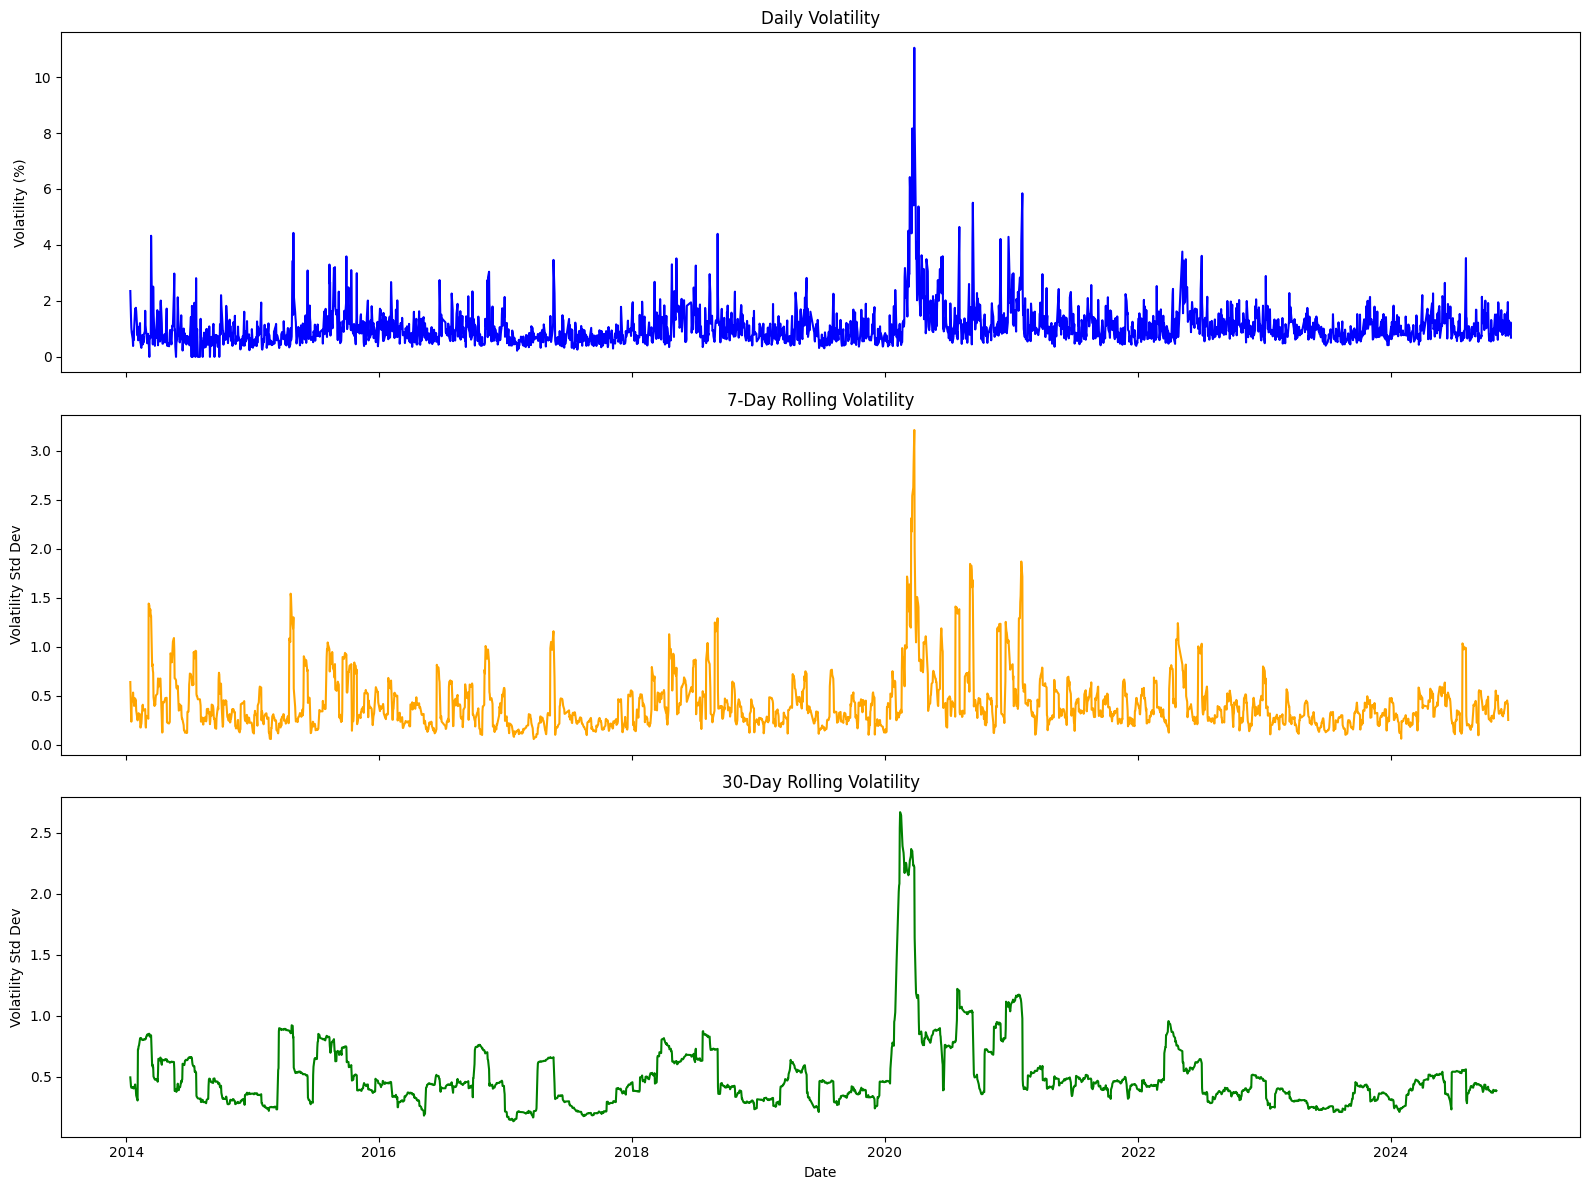

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 12), sharex=True)

axes[0].plot(df['Date'], df['Volatility'], color='blue')
axes[0].set_title('Daily Volatility')
axes[0].set_ylabel('Volatility (%)')

axes[1].plot(df['Date'], df['Rolling_Volatility_7'], color='orange')
axes[1].set_title('7-Day Rolling Volatility')
axes[1].set_ylabel('Volatility Std Dev')

axes[2].plot(df['Date'], df['Rolling_Volatility_30'], color='green')
axes[2].set_title('30-Day Rolling Volatility')
axes[2].set_ylabel('Volatility Std Dev')
axes[2].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
df['MA_7'] = df['Price'].rolling(window=7).mean()
df['MA_30'] = df['Price'].rolling(window=30).mean()

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Volatility,Rolling_Volatility_7,Rolling_Volatility_30,MA_7,MA_30
0,2024-12-13,7368.41,7386.44,7397.55,7347.07,6.940000e+09,-0.35,0.687077,NaN,NaN,NaN,NaN
1,2024-12-12,7394.24,7441.97,7470.89,7380.03,1.477000e+10,-0.94,1.231160,NaN,NaN,NaN,NaN
2,2024-12-11,7464.75,7444.86,7530.56,7444.17,2.355000e+10,0.15,1.160505,NaN,NaN,NaN,NaN
3,2024-12-10,7453.29,7448.77,7457.81,7396.79,2.034000e+10,0.21,0.824952,NaN,NaN,NaN,NaN
4,2024-12-09,7437.73,7382.61,7440.98,7380.66,2.301000e+10,0.74,0.817271,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2659,2014-01-20,4431.57,4408.03,4435.97,4407.88,2.650000e+09,0.44,0.637268,0.471334,0.416281,4422.767143,4489.404333
2660,2014-01-17,4412.23,4408.37,4429.57,4391.18,2.920000e+09,-0.01,0.874252,0.428163,0.409677,4432.850000,4483.672000
2661,2014-01-16,4412.49,4455.55,4457.76,4411.91,3.210000e+09,-0.66,1.039232,0.236739,0.410585,4445.665714,4476.747667
2662,2014-01-15,4441.59,4402.36,4459.48,4398.12,4.560000e+09,1.16,1.395142,0.330446,0.420321,4446.272857,4472.502667


In [ ]:
for col in ['Rolling_Volatility_7', 'Rolling_Volatility_30', 'MA_7', 'MA_30']:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Volatility,Rolling_Volatility_7,Rolling_Volatility_30,MA_7,MA_30
0,2024-12-13,7368.41,7386.44,7397.55,7347.07,6.940000e+09,-0.35,0.687077,0.416248,0.498214,5955.813566,5956.761328
1,2024-12-12,7394.24,7441.97,7470.89,7380.03,1.477000e+10,-0.94,1.231160,0.416248,0.498214,5955.813566,5956.761328
2,2024-12-11,7464.75,7444.86,7530.56,7444.17,2.355000e+10,0.15,1.160505,0.416248,0.498214,5955.813566,5956.761328
3,2024-12-10,7453.29,7448.77,7457.81,7396.79,2.034000e+10,0.21,0.824952,0.416248,0.498214,5955.813566,5956.761328
4,2024-12-09,7437.73,7382.61,7440.98,7380.66,2.301000e+10,0.74,0.817271,0.416248,0.498214,5955.813566,5956.761328
...,...,...,...,...,...,...,...,...,...,...,...,...
2659,2014-01-20,4431.57,4408.03,4435.97,4407.88,2.650000e+09,0.44,0.637268,0.471334,0.416281,4422.767143,4489.404333
2660,2014-01-17,4412.23,4408.37,4429.57,4391.18,2.920000e+09,-0.01,0.874252,0.428163,0.409677,4432.850000,4483.672000
2661,2014-01-16,4412.49,4455.55,4457.76,4411.91,3.210000e+09,-0.66,1.039232,0.236739,0.410585,4445.665714,4476.747667
2662,2014-01-15,4441.59,4402.36,4459.48,4398.12,4.560000e+09,1.16,1.395142,0.330446,0.420321,4446.272857,4472.502667


In [ ]:
df.isna().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0
Volatility,0
Rolling_Volatility_7,0
Rolling_Volatility_30,0


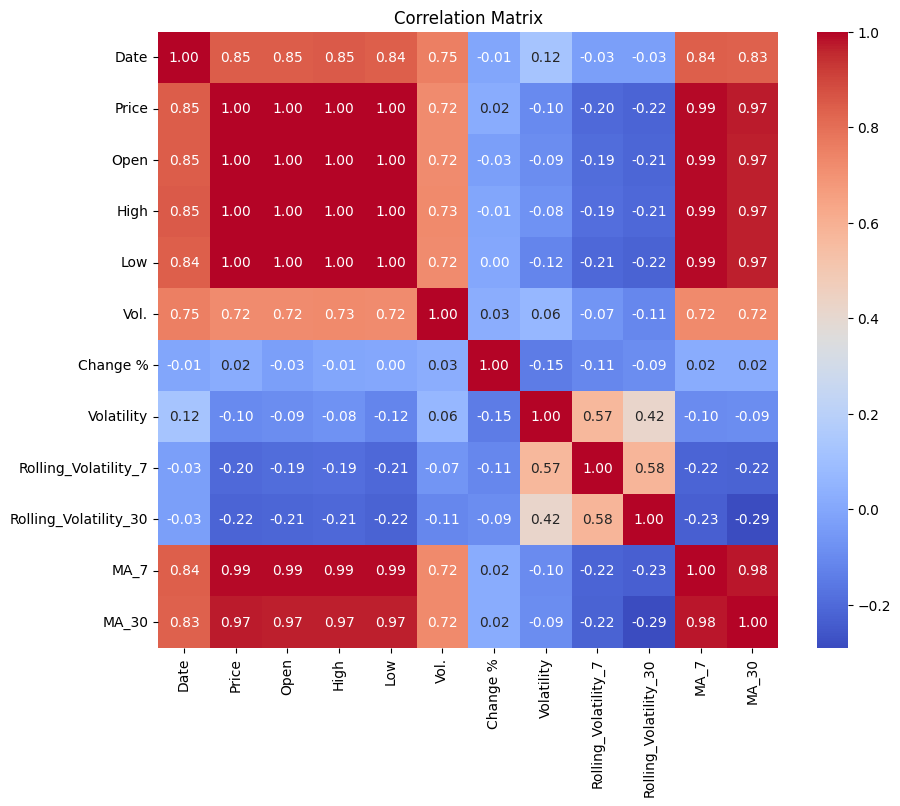

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import lightgbm as lgb

# Menyiapkan data
features_with_volatility = df[['Open', 'High', 'Low', 'Vol.', 'Change %', 'Volatility', 'Rolling_Volatility_7', 'Rolling_Volatility_30', 'MA_7', 'MA_30']]
features_without_volatility = df[['Open', 'High', 'Low', 'Vol.', 'Change %', 'MA_7', 'MA_30']]  # Tanpa fitur Volatilitas
labels = df['Price']

scaler = StandardScaler()

# Menggunakan fitur dengan volatilitas
features_with_volatility_scaled = scaler.fit_transform(features_with_volatility)

# Menggunakan fitur tanpa volatilitas
features_without_volatility_scaled = scaler.fit_transform(features_without_volatility)

# Fungsi untuk membentuk data time series untuk LSTM
def create_sequences(features, labels, time_steps=10):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(labels[i+time_steps])
    return np.array(X), np.array(y)

# Membentuk data time series untuk LSTM
time_steps = 10
X_with, y_with = create_sequences(features_with_volatility_scaled, labels, time_steps)
X_without, y_without = create_sequences(features_without_volatility_scaled, labels, time_steps)

# Membagi data menjadi training dan testing
X_train_with, X_test_with, y_train_with, y_test_with, train_dates_with, test_dates_with = train_test_split(
    X_with, y_with, df['Date'][time_steps:], test_size=0.2, random_state=42)

X_train_without, X_test_without, y_train_without, y_test_without, train_dates_without, test_dates_without = train_test_split(
    X_without, y_without, df['Date'][time_steps:], test_size=0.2, random_state=42)

# Membentuk model LSTM
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape, return_sequences=True),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Model LSTM untuk fitur dengan volatilitas
lstm_model_with = build_lstm_model((time_steps, X_train_with.shape[2]))
lstm_model_with.fit(X_train_with, y_train_with, epochs=50, batch_size=32, verbose=1)

# Model LSTM untuk fitur tanpa volatilitas
lstm_model_without = build_lstm_model((time_steps, X_train_without.shape[2]))
lstm_model_without.fit(X_train_without, y_train_without, epochs=50, batch_size=32, verbose=1)

# Model LightGBM untuk fitur dengan volatilitas
lgb_with = lgb.LGBMRegressor(random_state=42)
lgb_with.fit(X_train_with.reshape(X_train_with.shape[0], -1), y_train_with)

# Model LightGBM untuk fitur tanpa volatilitas
lgb_without = lgb.LGBMRegressor(random_state=42)
lgb_without.fit(X_train_without.reshape(X_train_without.shape[0], -1), y_train_without)

# Membuat prediksi
lstm_predictions_with = lstm_model_with.predict(X_test_with)
lstm_predictions_without = lstm_model_without.predict(X_test_without)

lgb_predictions_with = lgb_with.predict(X_test_with.reshape(X_test_with.shape[0], -1))
lgb_predictions_without = lgb_without.predict(X_test_without.reshape(X_test_without.shape[0], -1))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 33659240.0000
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7940509.0000
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 627017.0000
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 139230.1406
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 97554.7031
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 61591.4062
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 61878.1133
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 36103.3555
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 35954.5195
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 36649.6758
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 32820.6484
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 25774.6387
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 22392.7695
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 22532.1562
Epoch 15/50
67/67 ━

In [ ]:
# Menghitung MSE dan R2 untuk model dengan volatilitas
lstm_mse_with = mean_squared_error(y_test_with, lstm_predictions_with)
lstm_r2_with = r2_score(y_test_with, lstm_predictions_with)

lgb_mse_with = mean_squared_error(y_test_with, lgb_predictions_with)
lgb_r2_with = r2_score(y_test_with, lgb_predictions_with)

# Menghitung MSE dan R2 untuk model tanpa volatilitas
lstm_mse_without = mean_squared_error(y_test_without, lstm_predictions_without)
lstm_r2_without = r2_score(y_test_without, lstm_predictions_without)

lgb_mse_without = mean_squared_error(y_test_without, lgb_predictions_without)
lgb_r2_without = r2_score(y_test_without, lgb_predictions_without)

# Menampilkan hasil perbandingan
print("Model dengan Volatilitas:")
print(f"LSTM - MSE: {lstm_mse_with}, R2: {lstm_r2_with}")
print(f"LightGBM - MSE: {lgb_mse_with}, R2: {lgb_r2_with}")

print("\nModel tanpa Volatilitas:")
print(f"LSTM - MSE: {lstm_mse_without}, R2: {lstm_r2_without}")
print(f"LightGBM - MSE: {lgb_mse_without}, R2: {lgb_r2_without}")

Model dengan Volatilitas:
LSTM - MSE: 8378.039706238984, R2: 0.9890603767018683
LightGBM - MSE: 327.3458127344486, R2: 0.9995725682850526

Model tanpa Volatilitas:
LSTM - MSE: 7626.944644891574, R2: 0.9900411188945926
LightGBM - MSE: 362.3867377419126, R2: 0.999526813605791


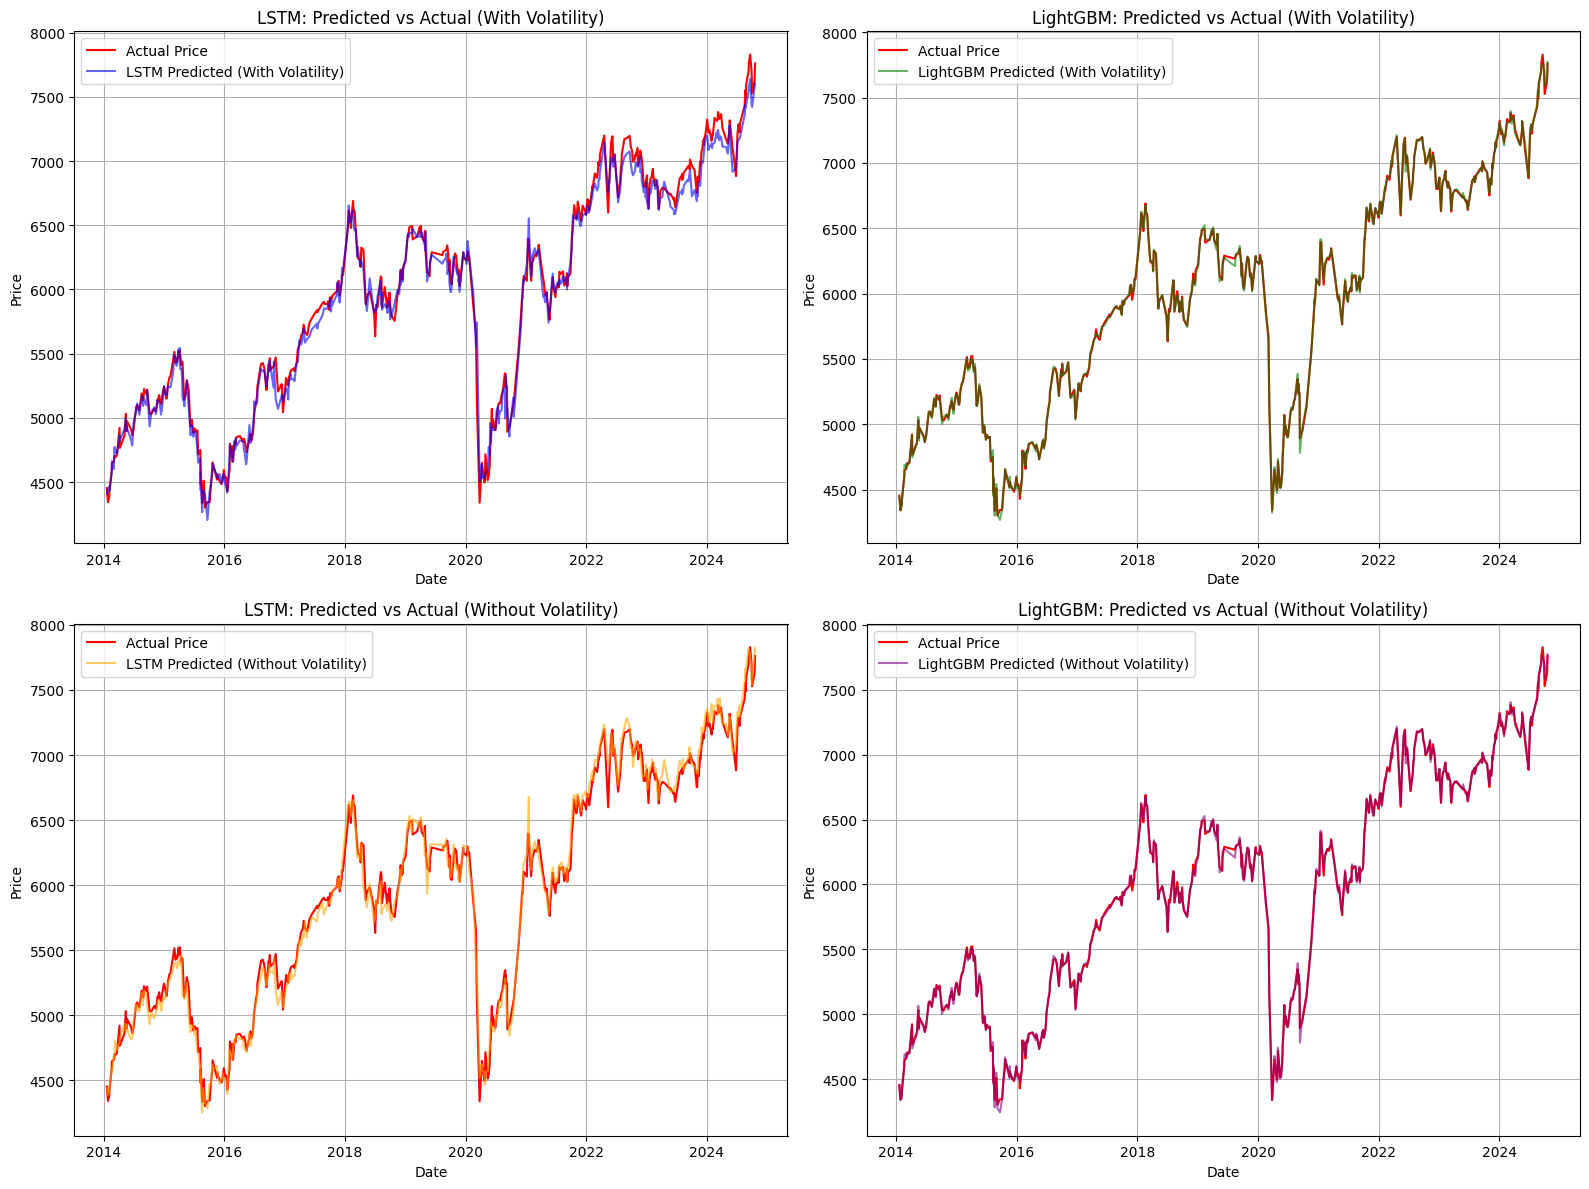

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mengurutkan data berdasarkan tanggal untuk visualisasi
sorted_indices_with = np.argsort(test_dates_with)
sorted_dates_with = np.array(test_dates_with)[sorted_indices_with]
sorted_y_test_with = np.array(y_test_with)[sorted_indices_with]

sorted_indices_without = np.argsort(test_dates_without)
sorted_dates_without = np.array(test_dates_without)[sorted_indices_without]
sorted_y_test_without = np.array(y_test_without)[sorted_indices_without]

# Prediksi dengan model yang sudah dilatih
lstm_y_pred_with = np.array(lstm_predictions_with).flatten()[sorted_indices_with]
lgb_y_pred_with = np.array(lgb_predictions_with)[sorted_indices_with]

lstm_y_pred_without = np.array(lstm_predictions_without).flatten()[sorted_indices_without]
lgb_y_pred_without = np.array(lgb_predictions_without)[sorted_indices_without]

# Membuat figur dengan 2 baris dan 2 kolom
plt.figure(figsize=(16, 12))

# Baris pertama: LSTM dengan Volatilitas & LightGBM dengan Volatilitas
plt.subplot(2, 2, 1)  # Baris 1, Kolom 1
plt.plot(sorted_dates_with, sorted_y_test_with, label='Actual Price', color='red')
plt.plot(sorted_dates_with, lstm_y_pred_with, label='LSTM Predicted (With Volatility)', color='blue', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM: Predicted vs Actual (With Volatility)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)  # Baris 1, Kolom 2
plt.plot(sorted_dates_with, sorted_y_test_with, label='Actual Price', color='red')
plt.plot(sorted_dates_with, lgb_y_pred_with, label='LightGBM Predicted (With Volatility)', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LightGBM: Predicted vs Actual (With Volatility)')
plt.legend()
plt.grid(True)

# Baris kedua: LSTM tanpa Volatilitas & LightGBM tanpa Volatilitas
plt.subplot(2, 2, 3)  # Baris 2, Kolom 1
plt.plot(sorted_dates_without, sorted_y_test_without, label='Actual Price', color='red')
plt.plot(sorted_dates_without, lstm_y_pred_without, label='LSTM Predicted (Without Volatility)', color='orange', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM: Predicted vs Actual (Without Volatility)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)  # Baris 2, Kolom 2
plt.plot(sorted_dates_without, sorted_y_test_without, label='Actual Price', color='red')
plt.plot(sorted_dates_without, lgb_y_pred_without, label='LightGBM Predicted (Without Volatility)', color='purple', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LightGBM: Predicted vs Actual (Without Volatility)')
plt.legend()
plt.grid(True)

# Menampilkan layout dengan rapih
plt.tight_layout()
plt.show()

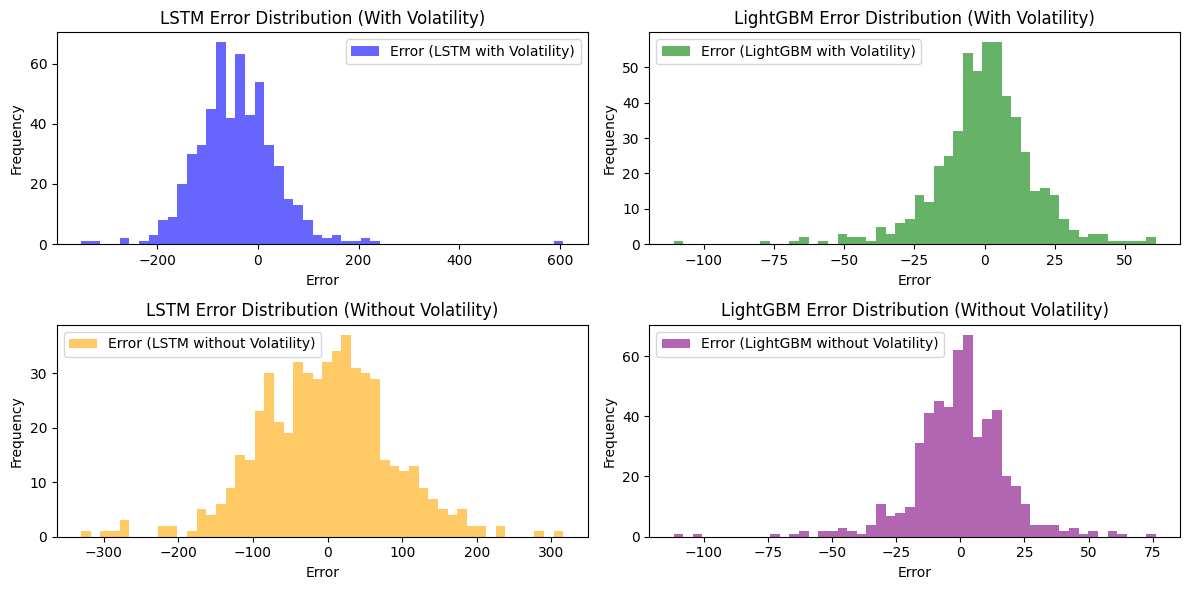

In [ ]:
# Menghitung error untuk setiap model
errors_lstm_with = lstm_predictions_with.flatten() - y_test_with
errors_lgb_with = lgb_predictions_with - y_test_with
errors_lstm_without = lstm_predictions_without.flatten() - y_test_without
errors_lgb_without = lgb_predictions_without - y_test_without

# Membuat figur histogram
plt.figure(figsize=(12, 6))

# Histogram untuk LSTM dengan Volatilitas
plt.subplot(2, 2, 1)
plt.hist(errors_lstm_with, bins=50, color='blue', alpha=0.6, label='Error (LSTM with Volatility)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('LSTM Error Distribution (With Volatility)')
plt.legend()

# Histogram untuk LightGBM dengan Volatilitas
plt.subplot(2, 2, 2)
plt.hist(errors_lgb_with, bins=50, color='green', alpha=0.6, label='Error (LightGBM with Volatility)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('LightGBM Error Distribution (With Volatility)')
plt.legend()

# Histogram untuk LSTM tanpa Volatilitas
plt.subplot(2, 2, 3)
plt.hist(errors_lstm_without, bins=50, color='orange', alpha=0.6, label='Error (LSTM without Volatility)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('LSTM Error Distribution (Without Volatility)')
plt.legend()

# Histogram untuk LightGBM tanpa Volatilitas
plt.subplot(2, 2, 4)
plt.hist(errors_lgb_without, bins=50, color='purple', alpha=0.6, label='Error (LightGBM without Volatility)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('LightGBM Error Distribution (Without Volatility)')
plt.legend()

# Menampilkan layout dengan rapih
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hasil perhitungan dari model LSTM dan LightGBM
results = {
    "Model": ["LSTM with Volatility", "LightGBM with Volatility", "LSTM without Volatility", "LightGBM without Volatility"],
    "MSE": [lstm_mse_with, lgb_mse_with, lstm_mse_without, lgb_mse_without],
    "R²": [lstm_r2_with, lgb_r2_with, lstm_r2_without, lgb_r2_without]
}

# Menghitung RMSE dari MSE
results["RMSE"] = [np.sqrt(mse) for mse in results["MSE"]]  # Menambahkan RMSE

# Membuat DataFrame untuk hasil evaluasi
results_df = pd.DataFrame(results)

# Menampilkan hasil evaluasi
print("Hasil Perbandingan Model:")
print(results_df)

# Pengujian statistik (T-test) untuk melihat perbedaan antara model dengan dan tanpa volatilitas
mse_with_volatility = [lstm_mse_with, lgb_mse_with]
mse_without_volatility = [lstm_mse_without, lgb_mse_without]

# Uji T untuk MSE
t_stat_mse, p_value_mse = stats.ttest_ind(mse_with_volatility, mse_without_volatility)
print(f"\nT-test untuk MSE: t-statistic = {t_stat_mse}, p-value = {p_value_mse}")

r2_with_volatility = [lstm_r2_with, lgb_r2_with]
r2_without_volatility = [lstm_r2_without, lgb_r2_without]

# Uji T untuk R²
t_stat_r2, p_value_r2 = stats.ttest_ind(r2_with_volatility, r2_without_volatility)
print(f"T-test untuk R²: t-statistic = {t_stat_r2}, p-value = {p_value_r2}")

Hasil Perbandingan Model:
                         Model          MSE        R²       RMSE
0         LSTM with Volatility  8378.039706  0.989060  91.531632
1     LightGBM with Volatility   327.345813  0.999573  18.092701
2      LSTM without Volatility  7626.944645  0.990041  87.332380
3  LightGBM without Volatility   362.386738  0.999527  19.036458

T-test untuk MSE: t-statistic = 0.06603365369057024, p-value = 0.9533579729856553
T-test untuk R²: t-statistic = -0.06603365369057593, p-value = 0.9533579729856513
